# EEG DATA ML (TITLE)

## Visualzing Data

### 1. Importing packages

In [20]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

### 2. Reading file names

In [4]:
test_filenames = os.listdir('Data\SMNI_CMI_TEST\Test')
train_filenames= os.listdir('Data\SMNI_CMI_TRAIN\Train')

### 3. Loading a file

In [5]:
filename = 'Data/SMNI_CMI_TRAIN/Train/'+ train_filenames[0]
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,0,FP1,0,-8.921,a,S1 obj,0,co2a0000364,0.000000
1,6,0,FP1,1,-8.433,a,S1 obj,0,co2a0000364,0.003906
2,7,0,FP1,2,-2.574,a,S1 obj,0,co2a0000364,0.007812
3,8,0,FP1,3,5.239,a,S1 obj,0,co2a0000364,0.011719
4,9,0,FP1,4,11.587,a,S1 obj,0,co2a0000364,0.015625


### 4. Identifying Labels and Features

In [6]:
labels = 'subject identifier'
features = 'sensor value'
print('Labels: ',labels)
print('Features: ',features)

Labels:  subject identifier
Features:  sensor value


In [10]:
X = df[features]
y = df[labels]
X,y[0]

(0        -8.921
 1        -8.433
 2        -2.574
 3         5.239
 4        11.587
           ...  
 16379     6.571
 16380    12.431
 16381    15.849
 16382    16.337
 16383    14.872
 Name: sensor value, Length: 16384, dtype: float64,
 'a')

### There are 256 time sequences with 64 channels

### 5. Preparing to vizualize

In [14]:
count = 0
main_Dict = {}
value_list = []
s_name = ''

for name in  df['sensor position']:
    if s_name != '':
        if ((count +1) == len(df['sensor position'])):
            value_list.append(df['sensor value'][count])
            main_Dict[s_name] = value_list
        elif name != s_name:
            main_Dict[s_name] = value_list
            value_list = []
            value_list.append(df['sensor value'][count])
        else:
            value_list.append(df['sensor value'][count])
    else:
        value_list.append(df['sensor value'][count])
    count +=1
    s_name = name
print('All the channels(64): \n',main_Dict.keys())
voltage_list = []
channel_list = []
for channel in main_Dict:
    temp_list_1 = []
    for value in main_Dict[channel]:
        temp_list_1.append(value)
    voltage_list.append(temp_list_1)
    channel_list.append(channel)
noOfvalues = []
for i in range(len(voltage_list[0])):
    noOfvalues.append(i)

All the channels(64): 
 dict_keys(['FP1', 'FP2', 'F7', 'F8', 'AF1', 'AF2', 'FZ', 'F4', 'F3', 'FC6', 'FC5', 'FC2', 'FC1', 'T8', 'T7', 'CZ', 'C3', 'C4', 'CP5', 'CP6', 'CP1', 'CP2', 'P3', 'P4', 'PZ', 'P8', 'P7', 'PO2', 'PO1', 'O2', 'O1', 'X', 'AF7', 'AF8', 'F5', 'F6', 'FT7', 'FT8', 'FPZ', 'FC4', 'FC3', 'C6', 'C5', 'F2', 'F1', 'TP8', 'TP7', 'AFZ', 'CP3', 'CP4', 'P5', 'P6', 'C1', 'C2', 'PO7', 'PO8', 'FCZ', 'POZ', 'OZ', 'P2', 'P1', 'CPZ', 'nd', 'Y'])


### 6. Visualizing Data

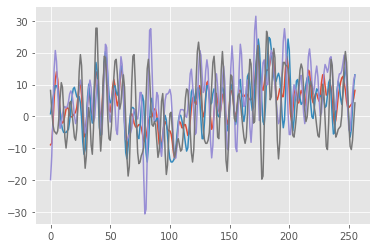

<Figure size 432x288 with 0 Axes>

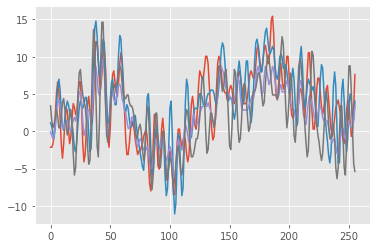

<Figure size 432x288 with 0 Axes>

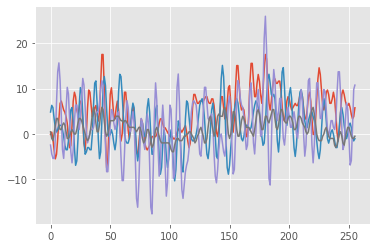

<Figure size 432x288 with 0 Axes>

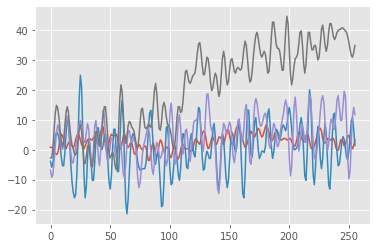

<Figure size 432x288 with 0 Axes>

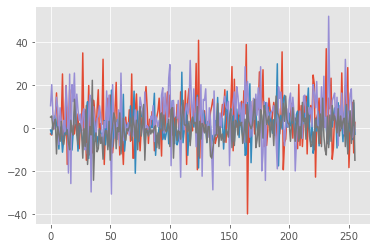

<Figure size 432x288 with 0 Axes>

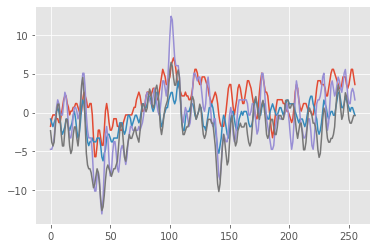

<Figure size 432x288 with 0 Axes>

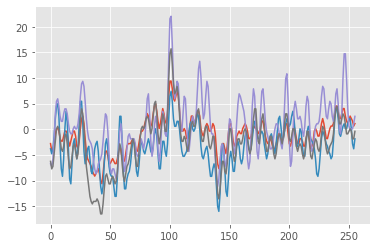

<Figure size 432x288 with 0 Axes>

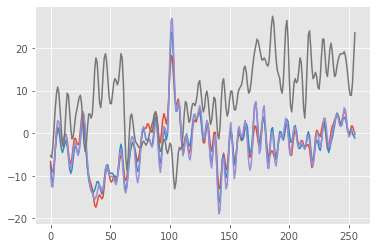

<Figure size 432x288 with 0 Axes>

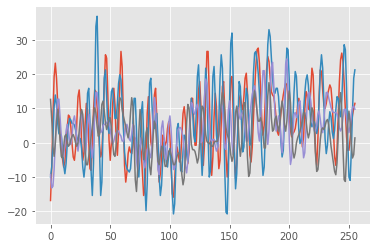

<Figure size 432x288 with 0 Axes>

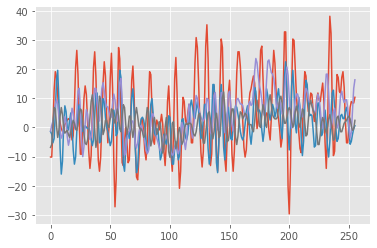

<Figure size 432x288 with 0 Axes>

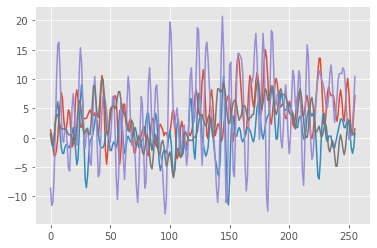

<Figure size 432x288 with 0 Axes>

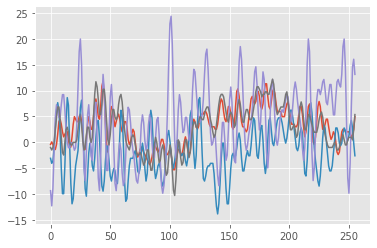

<Figure size 432x288 with 0 Axes>

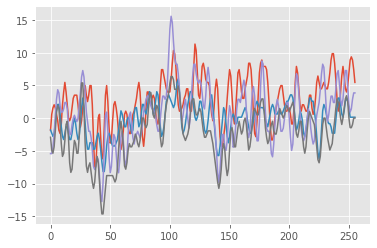

<Figure size 432x288 with 0 Axes>

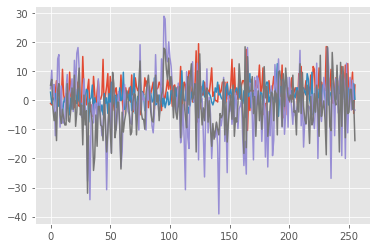

<Figure size 432x288 with 0 Axes>

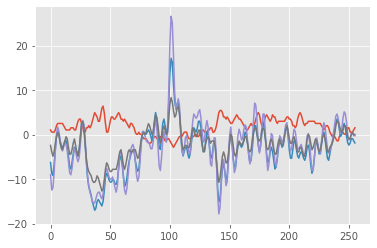

<Figure size 432x288 with 0 Axes>

In [27]:
count = 0
for _ in range(15):
    for i in range(4):
        plt.plot(voltage_list[count],label =channel_list[count])
#         plt.legend(channel_list[count])
        count += 1
    plt.figure()
    plt.show()

## Importing all Training and testing Data